# Network Expansion

PyPSA-GB can also allow for certain parameters to be optimised, which can be useful in planning studies. In this notebook network expansion is explored for the month of June in 2050.

In [2]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

import data_reader_writer

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

In [3]:
# write csv files for import
start = '2050-06-01 00:00:00'
end = '2050-06-30 23:30:00'
# year of simulation
year = int(start[0:4])
# time step as fraction of hour
time_step = 0.5

Choose from one of the National Grid Future Energy Scenarios.

In [4]:
scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
# scenario = 'System Transformation'
# scenario = 'Steady Progression'

Choose a baseline year (from 2010-2020). The baseline year determines which historical load profile and weather dataset is used for the future year modelled. The National Grid FES modellers used 2012 as their baseline year.

In [5]:
year_baseline = 2012

data_reader_writer is a script written to read in data from the various sources and write csv files in the format required for populating a PyPSA network object

In [6]:
data_reader_writer.data_writer(start, end, time_step, year, year_baseline=year_baseline,
                               scenario=scenario, merge_generators=True)

C:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
C:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:201: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


In [7]:
network = pypsa.Network()

network.import_from_csv_folder('LOPF_data')

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 19, 2], imported network file PyPSA version None.

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data has buses, generators, lines, links, loads, storage_units


Now going to allow the limit of the apparent power to flow through the line to be extendable, and provide a capital cost (cost of extending s_nom by 1 MVA.)

In [8]:
network.lines.s_nom_extendable = True
network.lines.s_nom_min = network.lines.s_nom
network.lines.capital_cost = 100000

In [9]:
network.lines

,bus0,bus1,r,x,b,s_nom,type,g,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
0,Beauly,Peterhead,0.01220,0.02000,0.0856,525.0,,0.0,True,525.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beauly,Errochty,0.00700,0.15000,0.0520,132.0,,0.0,True,132.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Beauly,Peterhead,0.01220,0.02000,0.2844,525.0,,0.0,True,525.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Beauly,Errochty,0.00700,0.15000,0.0520,132.0,,0.0,True,132.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Peterhead,Denny/Bonnybridge,0.00040,0.06500,0.4454,760.0,,0.0,True,760.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Sellindge,Kemsley,0.00020,0.00503,0.1797,3100.0,,0.0,True,3100.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,Lovedean,Sellindge,0.00038,0.00711,0.2998,3070.0,,0.0,True,3070.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Lovedean,Sellindge,0.00038,0.00711,0.2998,3070.0,,0.0,True,3070.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Run the optimisation

In [10]:
network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 27.62s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2022-09-03
Read LP format model from file C:\Users\alyden\AppData\Local\Temp\pypsa-problem-llbdtit0.lp
Reading time = 16.58 seconds
obj: 6491192 rows, 1828900 columns, 11680533 nonzeros
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 6491192 rows, 1828900 columns and 11680533 nonzeros
Model fingerprint: 0x8cc72c67
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [5e-01, 5e+08]
  Bounds range     [1e+02, 2e+10]
  RHS range        [1e-06, 1e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 6004488 rows and 1198103 columns (presolve time = 5s) ...
Presolve removed 6016000 rows and 1198103 columns
Presolve time: 8.08s
Preso

  92   1.37324800e+15  1.37324823e+15  2.03e-01 1.15e-03  2.68e-03   146s
  93   1.37324800e+15  1.37324823e+15  2.18e-01 1.14e-03  2.19e-03   147s
  94   1.37324800e+15  1.37324823e+15  2.22e-01 8.03e-04  1.88e-03   148s
  95   1.37324800e+15  1.37324823e+15  1.49e-01 5.90e-04  4.08e-04   149s
  96   1.37324800e+15  1.37324823e+15  1.42e-01 5.30e-04  2.57e-04   150s
  97   1.37324800e+15  1.37324823e+15  1.14e+00 5.30e-04  1.11e-04   151s
  98   1.37324800e+15  1.37324823e+15  7.36e-01 5.30e-04  7.47e-05   152s
  99   1.37324800e+15  1.37324823e+15  6.87e-01 5.30e-04  7.13e-05   153s
 100   1.37324800e+15  1.37324823e+15  6.32e-01 5.30e-04  6.74e-05   154s
 101   1.37324800e+15  1.37324823e+15  3.37e-01 5.30e-04  4.30e-05   155s
 102   1.37324800e+15  1.37324823e+15  4.05e-01 5.30e-04  4.07e-05   156s
 103   1.37324800e+15  1.37324823e+15  2.78e-01 5.30e-04  1.39e-05   157s
 104   1.37324800e+15  1.37324823e+15  1.64e-01 5.30e-04  6.44e-06   158s
 105   1.37324800e+15  1.37324823e+15 

 203   1.37324800e+15  1.37324823e+15  3.85e-01 8.47e-05  1.10e-13   272s
 204   1.37324800e+15  1.37324823e+15  3.84e-01 8.47e-05  5.58e-14   273s
 205   1.37324800e+15  1.37324823e+15  3.85e-01 8.47e-05  1.23e-13   274s
 206   1.37324800e+15  1.37324823e+15  3.82e-01 8.47e-05  6.85e-14   275s
 207   1.37324800e+15  1.37324823e+15  3.82e-01 8.47e-05  8.60e-14   277s
 208   1.37324800e+15  1.37324823e+15  3.90e-01 8.47e-05  5.49e-14   278s
 209   1.37324800e+15  1.37324823e+15  3.86e-01 8.47e-05  3.04e-14   280s
 210   1.37324800e+15  1.37324823e+15  3.86e-01 8.47e-05  1.55e-13   281s
 211   1.37324800e+15  1.37324823e+15  3.88e-01 8.47e-05  2.47e-12   282s
 212   1.37324800e+15  1.37324823e+15  3.86e-01 8.47e-05  2.90e-12   284s
 213   1.37324800e+15  1.37324823e+15  3.90e-01 8.47e-05  2.61e-12   285s
 214   1.37324800e+15  1.37324823e+15  3.89e-01 8.47e-05  5.88e-12   287s
 215   1.37324800e+15  1.37324823e+15  3.87e-01 8.47e-05  2.86e-12   288s
 216   1.37324800e+15  1.37324823e+15 

INFO:pypsa.linopf:Optimization successful. Objective value: 1.37e+15


('ok', 'optimal')

## Outputs

In [11]:
now = network.snapshots[139]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    99.000000
mean      1.028934
std       2.648959
min      -1.642279
25%      -0.161878
50%       0.387773
75%       0.937469
max      14.046506
dtype: float64

(<matplotlib.collections.PatchCollection at 0x1eb15cc1e80>,
 <matplotlib.collections.LineCollection at 0x1eb15cc1c70>)

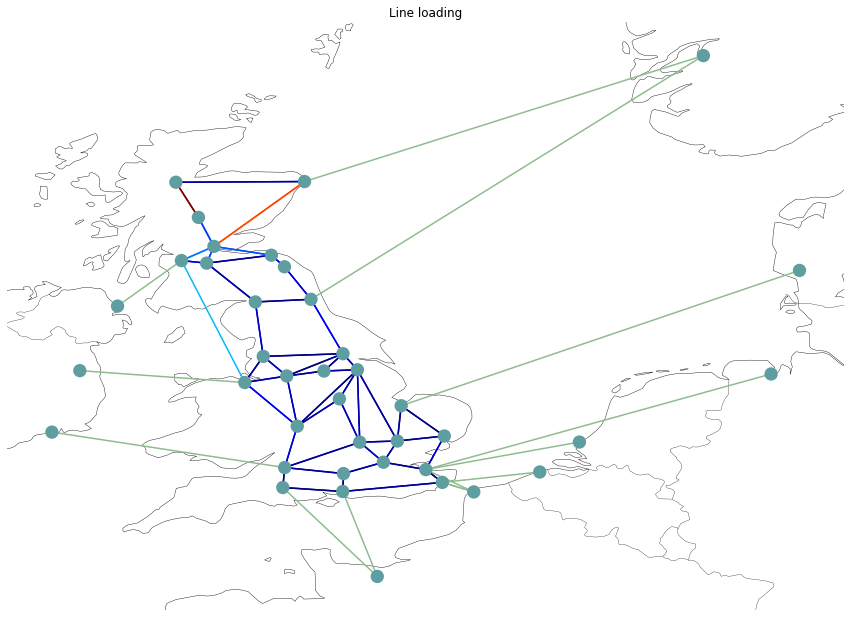

In [12]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

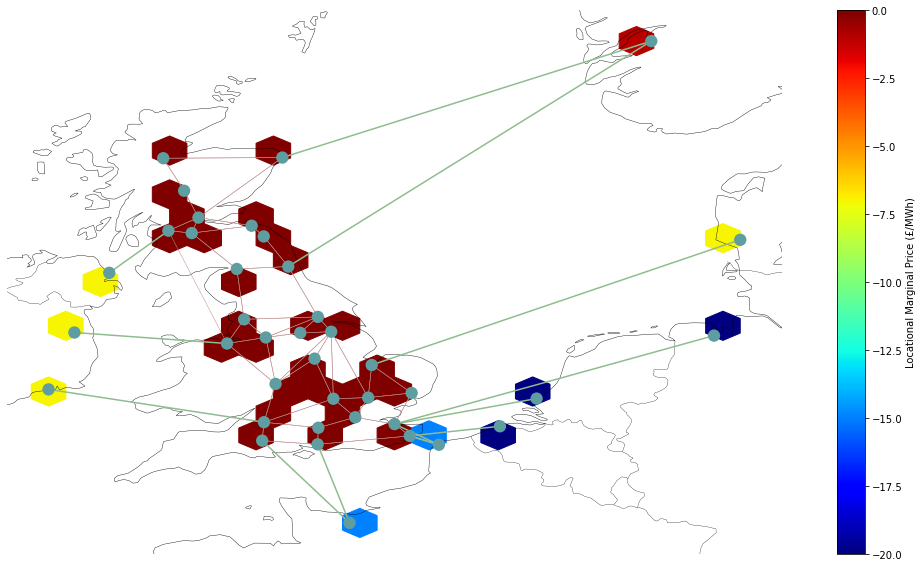

In [13]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

## Line expansion results

In [14]:
network.lines.s_nom_opt
difference = network.lines.s_nom_opt - network.lines.s_nom
relative_difference = (network.lines.s_nom_opt - network.lines.s_nom) / network.lines.s_nom

Text(0.5, 0, 'Line')

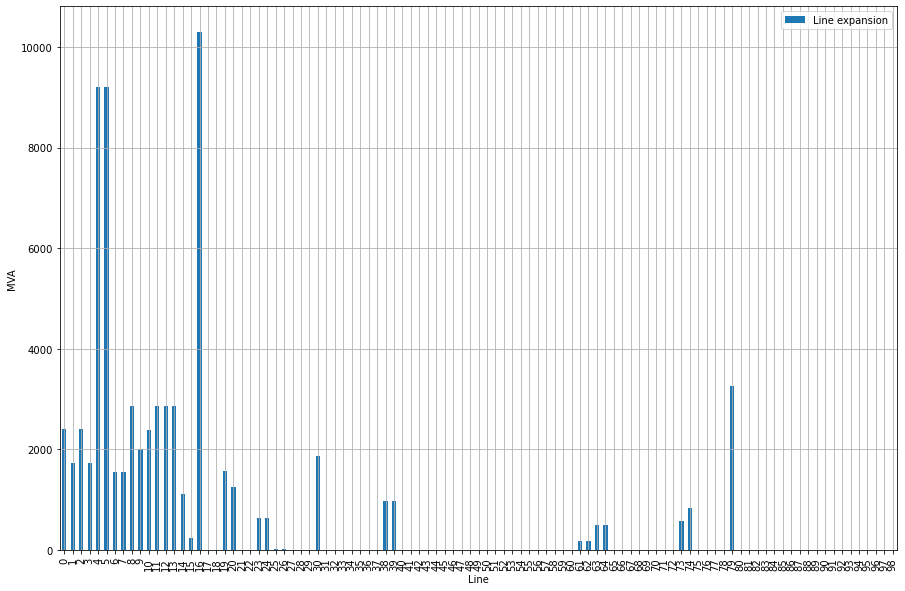

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

difference.plot(kind='bar', label="Line expansion", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MVA")
ax.set_xlabel("Line")

Text(0.5, 0, 'Line')

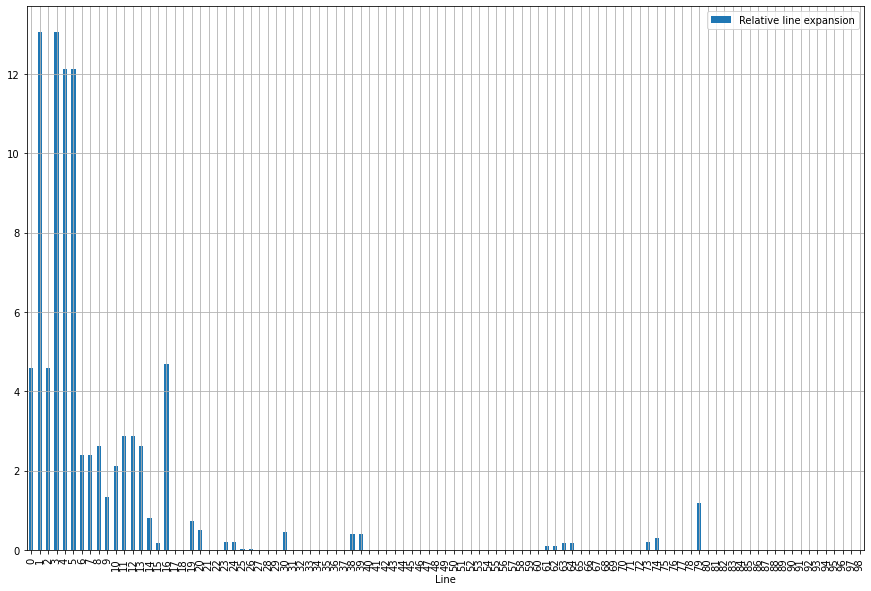

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

relative_difference.plot(kind='bar', label="Relative line expansion", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("")
ax.set_xlabel("Line")